In [708]:
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import pandas as pd
from datetime import datetime
%matplotlib inline
from wordcloud import WordCloud

In [709]:
metric_df=pd.read_csv('2014matricresults.csv')
metric_df.head(100)

,emis,exam_no,school,dinaledi,quintile,_2014_pass_rate,_2014_achieved,_2014_wrote,_2013_pass_rate,_2013_achieved,_2013_wrote,_2012_pass_rate,_2012_achieved,_2012_wrote
0,200600556,4091018,Cradock Prison,N,3.0,0.0,0,5,0.0,0.0,4.0,NaN,NaN,NaN
1,200401085,4011018,Ugie High,N,4.0,95.7,66,69,100.0,56.0,56.0,100.0,59.0,59.0
2,200501160,4021028,St Marks Senior Secondary,N,NaN,20.0,4,20,NaN,NaN,NaN,NaN,NaN,NaN
3,700400168,8400168,Cedarwood School,N,NaN,100.0,9,9,NaN,NaN,NaN,NaN,NaN,NaN
4,700400446,8400446,Rivernorth Commercial School,N,NaN,46.7,7,15,NaN,NaN,NaN,NaN,NaN,NaN
5,500101306,5113238,Amabuye S,N,NaN,24.0,12,50,NaN,NaN,NaN,NaN,NaN,NaN
6,500203426,5312219,Mashesha Js,N,NaN,50.0,18,36,NaN,NaN,NaN,NaN,NaN,NaN
7,500273282,5411337,Sompukwane S,N,NaN,56.4,22,39,NaN,NaN,NaN,NaN,NaN,NaN
8,500444962,5211242,Phuthini S,N,NaN,12.5,2,16,NaN,NaN,NaN,NaN,NaN,NaN
9,800029942,6242391,Laeveld Akademie,N,NaN,100.0,5,5,NaN,NaN,NaN,NaN,NaN,NaN


In [710]:
# get the number of values per column inlcuding missing values
metric_df.count()

emis               1000
exam_no            1000
school             1000
dinaledi           1000
quintile            928
_2014_pass_rate    1000
_2014_achieved     1000
_2014_wrote        1000
_2013_pass_rate     974
_2013_achieved      974
_2013_wrote         974
_2012_pass_rate     956
_2012_achieved      956
_2012_wrote         956
dtype: int64

In [711]:
#pass rate per school 
metric_df.school.unique()
# get the number of missing data points per column
missing_values_count = metric_df.isnull().sum()
# look at the # of missing points in the first ten columns
missing_values_count[0:]

#missing colums 
#quintile           72
#_2013_pass_rate    26
#_2013_achieved     26
#_2013_wrote        26
#_2012_pass_rate    44
#_2012_achieved     44
#_2012_wrote        44


emis                0
exam_no             0
school              0
dinaledi            0
quintile           72
_2014_pass_rate     0
_2014_achieved      0
_2014_wrote         0
_2013_pass_rate    26
_2013_achieved     26
_2013_wrote        26
_2012_pass_rate    44
_2012_achieved     44
_2012_wrote        44
dtype: int64

In [712]:
metric_df.fillna(0).head()

,emis,exam_no,school,dinaledi,quintile,_2014_pass_rate,_2014_achieved,_2014_wrote,_2013_pass_rate,_2013_achieved,_2013_wrote,_2012_pass_rate,_2012_achieved,_2012_wrote
0,200600556,4091018,Cradock Prison,N,3.0,0.0,0,5,0.0,0.0,4.0,0.0,0.0,0.0
1,200401085,4011018,Ugie High,N,4.0,95.7,66,69,100.0,56.0,56.0,100.0,59.0,59.0
2,200501160,4021028,St Marks Senior Secondary,N,0.0,20.0,4,20,0.0,0.0,0.0,0.0,0.0,0.0
3,700400168,8400168,Cedarwood School,N,0.0,100.0,9,9,0.0,0.0,0.0,0.0,0.0,0.0
4,700400446,8400446,Rivernorth Commercial School,N,0.0,46.7,7,15,0.0,0.0,0.0,0.0,0.0,0.0


N    936
Y     64
Name: dinaledi, dtype: int64
The percent of students with Distinction is: 6.4


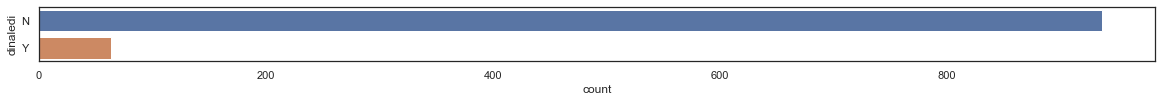

In [603]:
df_bin = metric_df      # for discretised continuous variables
df_con = metric_df      # for continuous variables

# How many students got distinctions 
fig = plt.figure(figsize=(20,1))
sns.countplot(y='dinaledi', data=df_bin);
print(df_bin.dinaledi.value_counts())
#counts how many got distinctions 
DinPercentage= (64/1000)*100
print("The percent of students with Distinction is:",DinPercentage)

In [608]:
# fill zeros in the quintile column in place of nans 
metric_df['quintile'].fillna(0, inplace=True)
metric_df.quintile.unique()

metric_df['_2012_wrote'].fillna(0, inplace=True)
metric_df['_2013_wrote'].fillna(0, inplace=True)
metric_df['_2013_pass_rate'].fillna(0, inplace=True)
metric_df['_2012_pass_rate'].fillna(0, inplace=True)


array([  0. , 100. ,  74.2,  56.3,  69.8,  84.6,  63.9,  31. ,  37.4,
         4.5,  70.6,  19.2,  59.6,  57.4,  21.1,  73.9,  60. ,  75. ,
        50.7,  53.7,  11.1,  27.7,  57.8,  80.9,  40. ,  39.5,  65.7,
        20.6,  61.3,  60.5,  35.1,  64.3,  65.9,  62.5,  60.3,  76.9,
        64.8,  75.6,  47.5,  76.5,  42.9,  31.3,  53.5,  93.5,  68. ,
        42.6,  61.7,  63. ,  30.8,  89.8,  96.1,  82.6,  72.5,  35.7,
        45.1,  39.4,  20. ,  73.5,  71.4,  57.1,  82.2,  54.8,  46.2,
        97.1,  96.2,  94.5,  78.6,  52.8,  75.7,  94.9,  91. ,  65.4,
        23.1,  95.3,  55.9,  73.3,  75.4,  48.6,  70.7,  78.9,  96.9,
        26.7,  54.3,  52.9,  57.9,  65.6,  42.7,  50. ,  28.7,  44. ,
        57.6,  35.9,  72.7,  41.4,  65.8,  48. ,  28.8,  38.2,  34.9,
        84.3,  61.1,  77.8,  38.9,  79.6,  32.4,  56.5,  60.2,  46.9,
        33.3,  41.6,  28.6,  61.2,  65. ,  45.5,  75.3,  29.8,  36.5,
        88. ,  63.5,  95.9,  75.5,  98.9,  64.1,  71.6,  84.9,  76.7,
        69. ,  88.6,

Quintile one statistics per year
In the Year 2012, the pass rate was 54.09747474747476 while 2013 improved by 2% from 2012 with a total of 58.32929292929294 with 2014 dropping by 1% from 2013 performance, and achieving a pass rate of 58.92777777777776


Text(0.5, 1.0, 'Yealry Pass Rate by Quintiles')

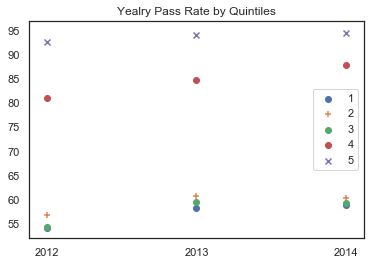

In [574]:
#using functions and varialbes to plot 
#group data by quintiles 
grouped = metric_df.groupby('quintile')
#Quintile 1

Q1ave2012 = grouped.get_group(1.0)['_2012_pass_rate'].mean()
Q1ave2013 = grouped.get_group(1.0)['_2013_pass_rate'].mean()
Q1ave2014 = grouped.get_group(1.0)['_2014_pass_rate'].mean()
print('Quintile one statistics per year')
print("In the Year 2012, the pass rate was",Q1ave2012, "while 2013 improved by 2% from 2012 with a total of",Q1ave2013,
                   "with 2014 dropping by 1% from 2013 performance, and achieving a pass rate of",Q1ave2014) 

x= ('2012','2013','2014')
y = (Q1ave2012,Q1ave2013,Q1ave2014)
plt.scatter(x,y, label='Quintile 1')

#Quintile 2
Q2ave2012 = grouped.get_group(2.0)['_2012_pass_rate'].mean()
Q2ave2013 = grouped.get_group(2.0)['_2013_pass_rate'].mean()
Q2ave2014 = grouped.get_group(2.0)['_2014_pass_rate'].mean()
x= ('2012','2013','2014')
y = (Q2ave2012,Q2ave2013,Q2ave2014)
plt.scatter(x,y, marker='+', label='Quintile 2')

#Quintile 3
Q3ave2012 = grouped.get_group(3.0)['_2012_pass_rate'].mean()
Q3ave2013 = grouped.get_group(3.0)['_2013_pass_rate'].mean()
Q3ave2014 = grouped.get_group(3.0)['_2014_pass_rate'].mean()
x= ('2012','2013','2014')
y = (Q3ave2012,Q3ave2013,Q3ave2014)
plt.scatter(x,y, marker='o')

#Quintile 4
Q4ave2012 = grouped.get_group(4.0)['_2012_pass_rate'].mean()
Q4ave2013 = grouped.get_group(4.0)['_2013_pass_rate'].mean()
Q4ave2014 = grouped.get_group(4.0)['_2014_pass_rate'].mean()
x= ('2012','2013','2014')
y = (Q4ave2012,Q4ave2013,Q4ave2014)
plt.scatter(x,y)
#plt.legend(loc='lower right')


#Quintile 5
Q5ave2012 = grouped.get_group(5.0)['_2012_pass_rate'].mean()
Q5ave2013 = grouped.get_group(5.0)['_2013_pass_rate'].mean()
Q5ave2014 = grouped.get_group(5.0)['_2014_pass_rate'].mean()

x= ('2012','2013','2014')
y = (Q5ave2012,Q5ave2013,Q5ave2014)
plt.scatter(x,y , marker='x')
plt.legend("12345",loc='center right')
plt.title("Yealry Pass Rate by Quintiles")

#from the graph, we can see that the tp Quintile is 5, which has maintained its percentage in the 90s
#while Quintile four has been slightly inproving from 2012 maintaining upward trend to catch up with Quintile 5
#Quintile one to three are also improving at a slower rate. this data can assist Dept of Edu to know where to look when
#they need to improve the pass rates, challenges are mainly in Q1-3 but 4 can still improve as well, lessons from Q5 could be 
#inhereted in Q1-4 for improvements. 

C:\Users\ramonic\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:32: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.


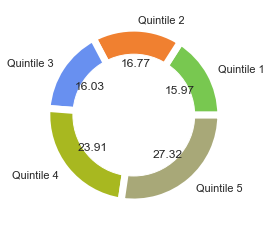

None


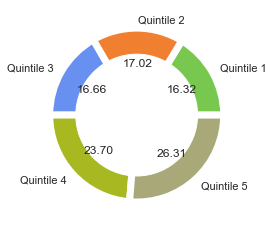

None


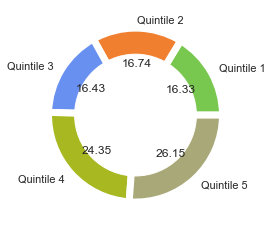

None


In [575]:
#methods on visualisaitons 
#the following calculates average metric results in the years 2012 to 2014 also showing percentages of quintiles

# group averages of the quintiles per year and assign each to a variable 
twenty_twelve_av=(Q1ave2012,Q2ave2012,Q3ave2012,Q4ave2012,Q5ave2012)
twenty_thirt_av=(Q1ave2013,Q2ave2013,Q3ave2013,Q4ave2013,Q5ave2013)
twenty_fourt_av=(Q1ave2014,Q2ave2014,Q3ave2014,Q4ave2014,Q5ave2014)

pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]
   
def donut(): 
   
    my_circle=plt.Circle( (0,0), 0.7, color='white')
    #size = [Q1ave2014,Q2ave2014,Q3ave2014,Q4ave2014,Q5ave2014]
    size = [x]
    name = 'Quintile 1', 'Quintile 2','Quintile 3', 'Quintile 4','Quintile 5'
    plt.pie(size, labels=name, autopct = '%1.2f',colors=pkmn_type_colors, wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' })
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    #plt.legend(loc="best")
    #plt.title("Average metric results")
    plt.show()
 
#create a list of above variables 
Yearlist = (twenty_twelve_av,twenty_thirt_av,twenty_fourt_av)

#iterate through the list to plot three donuts for each year 
for x in Yearlist:
    print(donut())

    

# the donuts shows the yearly pass rate contribution per quintile, from the analysis done above, 
#it is clear that quintile one is at 16% because it has high numbers of pupils that wrote, 
#as its overall pass rate is very low


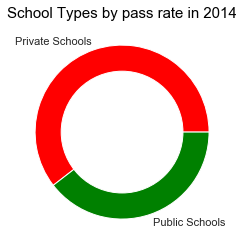

In [576]:
#group quintiles into two groups// Quintile 1-3 Public schools  and Quintile 4-5 Private schools
#Quintile 1 schools are the poorest and quintile 5 the wealthiest‚ usually former Model C schools
#Quintiles 4 and 5 receive the smallest subsidies from government and quintiles 1 to 3 are no-fee schools
#and get slightly bigger subsidies

# the following calculates averages of all the Quintiles in 2014
fees = ((Q5ave2014 + Q4ave2014)/2)
no_fees=((Q1ave2014+Q2ave2014+Q3ave2014)/3)


#lets visualise the two groups to see which one performed better in 2014 (an iteration is required to plot three donuts)
names='Private Schools', 'Public Schools'
size=[fees,no_fees] 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
# Give color names
plt.pie(size, labels=names, colors=['red','green'])
plt.title("School Types by pass rate in 2014", color='black', fontsize=15)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


In [690]:
grouped = metric_df.groupby('dinaledi')
grouped.get_group('Y')


,emis,exam_no,school,dinaledi,quintile,_2014_pass_rate,_2014_achieved,_2014_wrote,_2013_pass_rate,_2013_achieved,_2013_wrote,_2012_pass_rate,_2012_achieved,_2012_wrote
29,200300124,4161013,Gwelane Senior Secondary,Y,1.0,51.3,39,76,79.0,49.0,62.0,73.9,34.0,46.0
46,200300420,4161024,Ndabankulu Senior Secondary,Y,3.0,76.8,126,164,78.4,152.0,194.0,65.9,87.0,132.0
57,200300646,4161031,Vuli-Valley Senior Secondary,Y,4.0,53.2,82,154,74.3,107.0,144.0,53.5,107.0,200.0
63,200300709,4161036,Zweliwelile Senior Secondary,Y,3.0,40.4,42,104,57.2,87.0,152.0,61.7,37.0,60.0
75,200600335,4141009,Khwaza Senior Secondary,Y,1.0,46.6,27,58,44.1,45.0,102.0,73.5,36.0,49.0
84,200600552,4141018,Ncuncuzo Senior Secondary,Y,2.0,74.1,103,139,67.6,69.0,102.0,80.9,72.0,89.0
89,200600987,4141022,St. James Senior Secondary,Y,3.0,98.3,173,176,94.4,185.0,196.0,94.9,167.0,176.0
114,200300051,4151005,Colosa Senior Secondary,Y,2.0,65.7,94,143,62.1,54.0,87.0,44.0,70.0,159.0
126,200300153,4151016,JS Skenjana Senior,Y,3.0,89.3,201,225,93.3,237.0,254.0,84.3,166.0,197.0
151,200200072,4181006,Blyletts Combined,Y,2.0,84.6,110,130,88.3,91.0,103.0,95.9,70.0,73.0


C:\Users\ramonic\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:1324: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\ramonic\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:1328: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


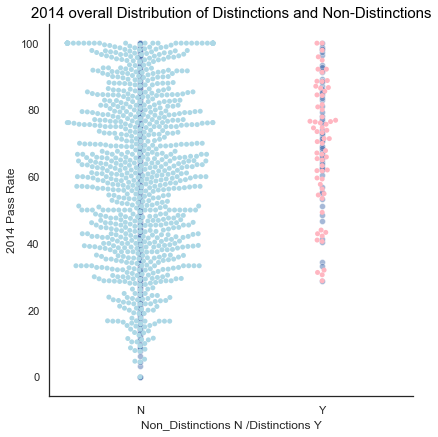

In [713]:
# the following is supposed to plot distincitons and non distinctions for year 2014 (an iteration is required to plot for all three years)
sns.set(style="white")


sns.relplot(x="dinaledi",y="_2014_pass_rate",sizes=(40, 400), alpha=0.5, palette="muted",height=6, data=metric_df)
sns.swarmplot("dinaledi","_2012_pass_rate", data=metric_df,palette=["lightblue", "lightpink"]);
#sns.violinplot(x= 'dinaledi', y='_2013_pass_rate',data=metric_df,palette=pkmn_type_colors) 

plt.xlabel('Non_Distinctions N /Distinctions Y')
plt.ylabel('2014 Pass Rate')
plt.title('2014 overall Distribution of Distinctions and Non-Distinctions', color = 'black', fontsize=15)
plt.show()

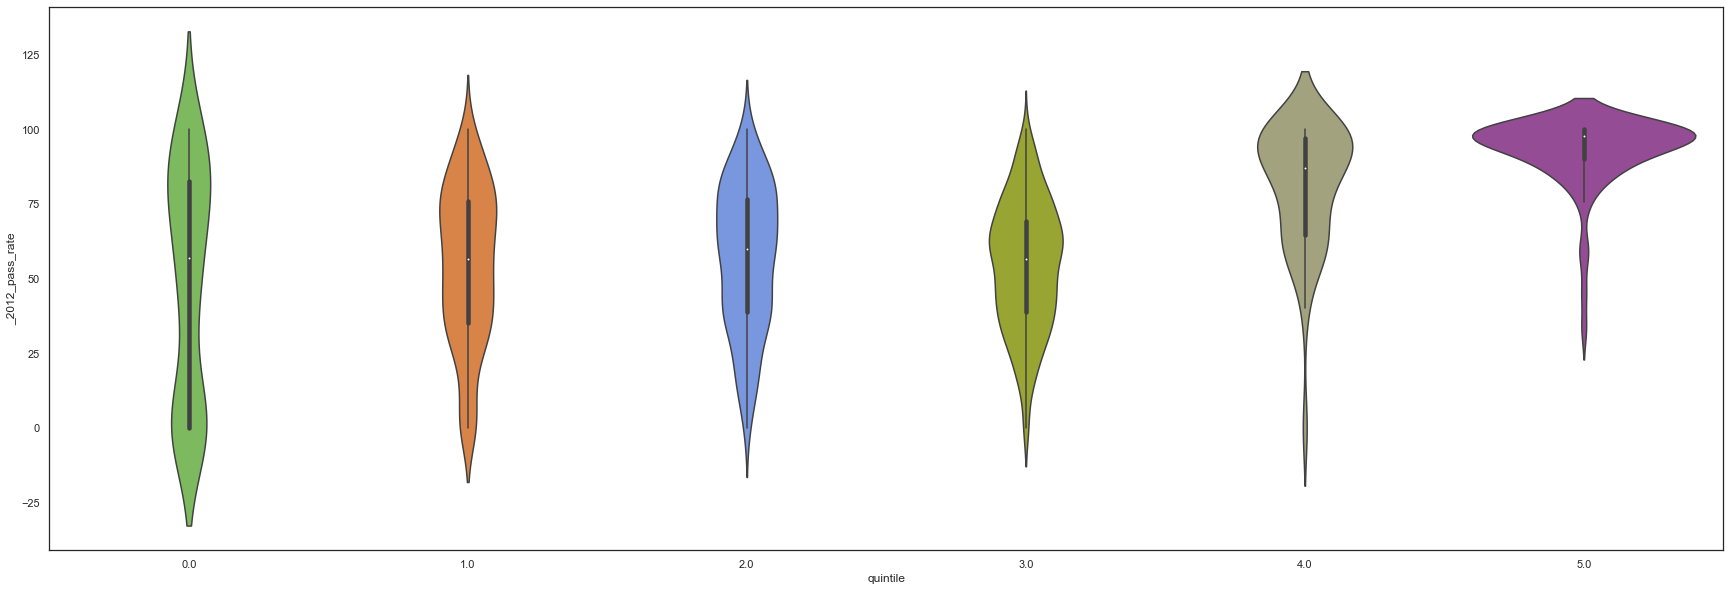

In [673]:
plt.figure(figsize=(30,10))
sns.set_style('white')
sns.violinplot(x= 'quintile', y='_2012_pass_rate',data=metric_df,palette=pkmn_type_colors) 
#2013 pass rate across quintiles 

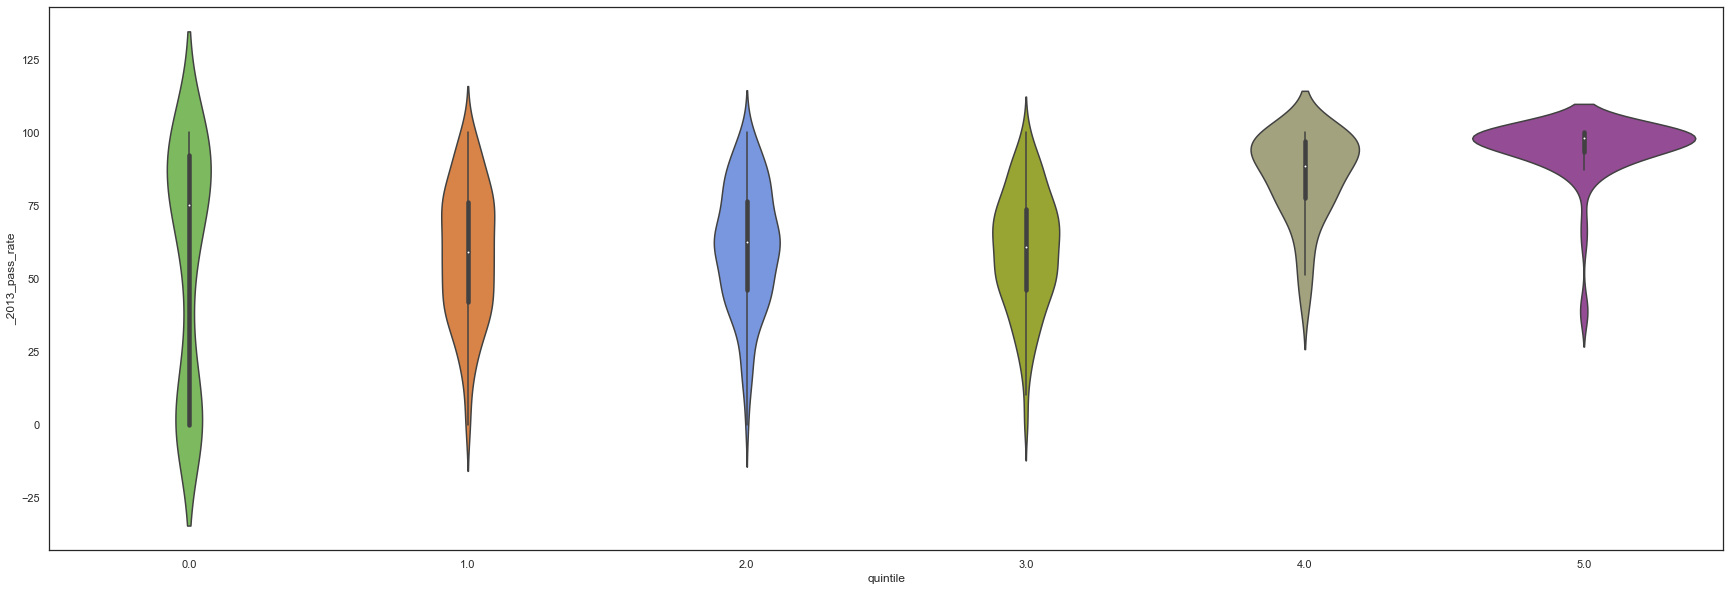

In [674]:
plt.figure(figsize=(30,10))
sns.set_style('white')
sns.violinplot(x= 'quintile', y='_2013_pass_rate',data=metric_df,palette=pkmn_type_colors) 
#2013 pass rate across quintiles 

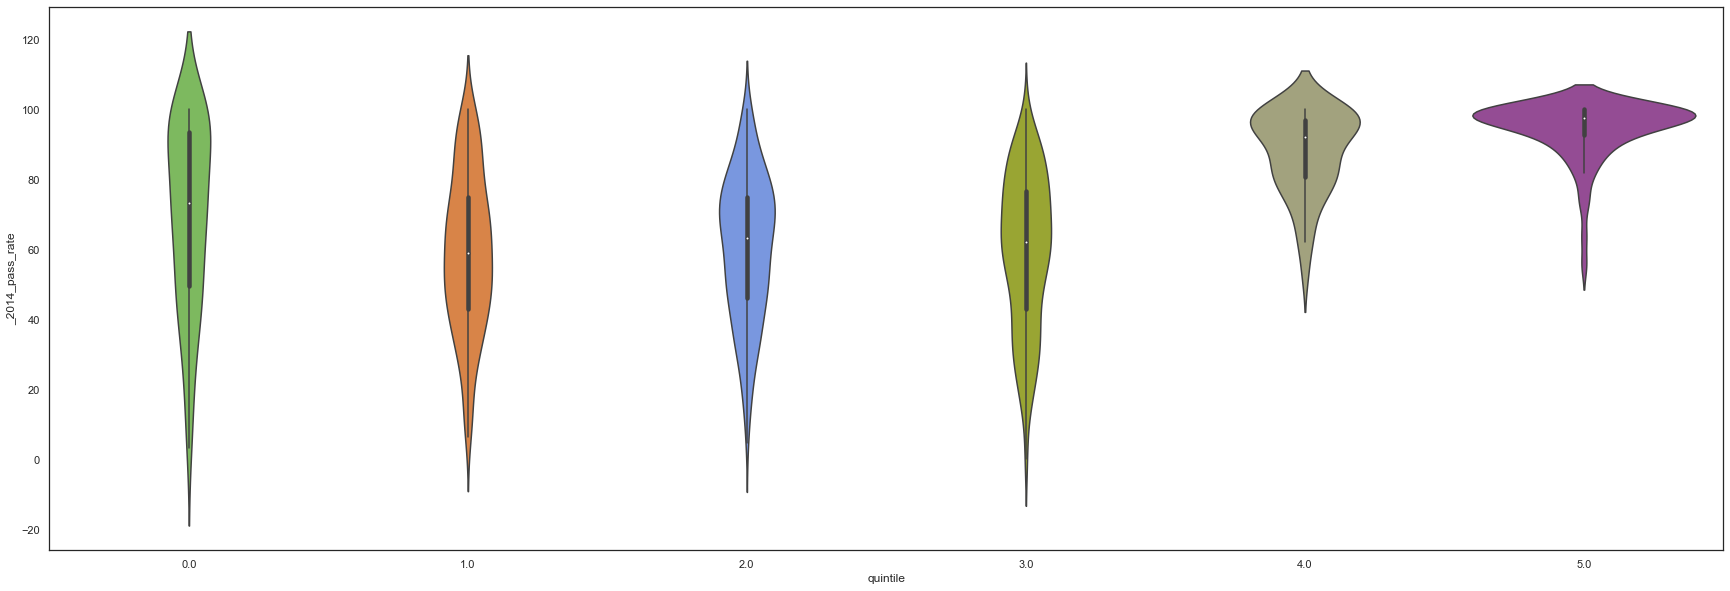

In [675]:
plt.figure(figsize=(30,10))
sns.set_style('white')
sns.violinplot(x= 'quintile', y='_2014_pass_rate',data=metric_df,palette=pkmn_type_colors) 
#2013 pass rate across quintiles 

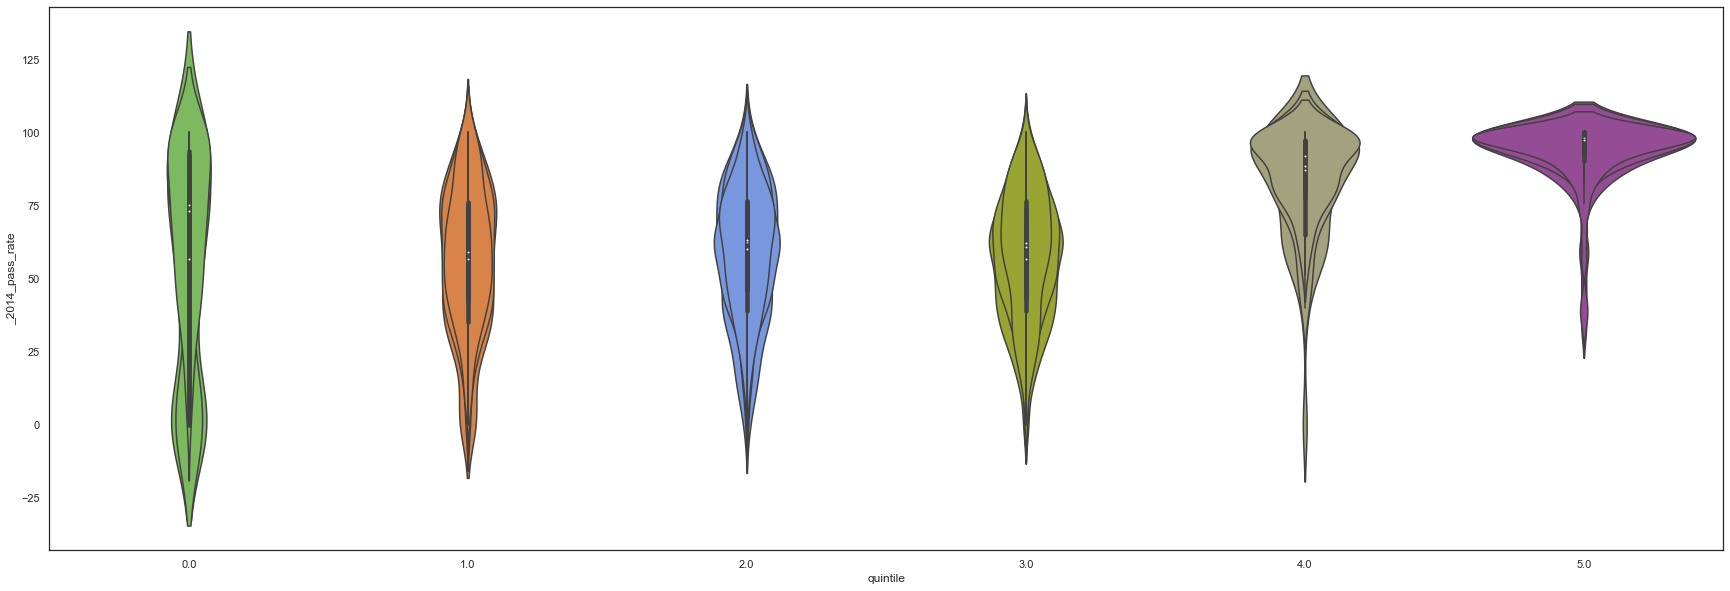

In [676]:
#combination of all the above three visualisations should show  any positive or negative variation of performace 
plt.figure(figsize=(30,10))
sns.set_style('white')
sns.violinplot(x= 'quintile', y='_2012_pass_rate',data=metric_df,palette=pkmn_type_colors) 
sns.violinplot(x= 'quintile', y='_2013_pass_rate',data=metric_df,palette=pkmn_type_colors) 
sns.violinplot(x= 'quintile', y='_2014_pass_rate',data=metric_df,palette=pkmn_type_colors) 
plt.show()
# The combined visualisation is very interesting on how the violines changes shape
# Quintile zero consists of unsorted pupils (pupils not falling under any quintile, this stemmed from NaN values found in the quintile column)
# if quintile zero was grouped as well, there could still be pass rate improvements in other quintiles.
#it also shows that the overall data may not be a true reflection of the results 
# in this situation we cannot use mean() to fill up the data set as it will be biased. take a school that has 0% pass rate wedged between 80% and 90% pass rate, that will give the school 70% pass rate


In [660]:
#calculcations 
a =metric_df._2012_wrote.sum()
b= metric_df._2013_wrote.sum()
c= metric_df._2014_wrote.sum()
d = (a+b+c).sum()
print(d) # prints out number of metriculants who wrote the exam 

e =metric_df._2012_achieved.sum()
f= metric_df._2013_achieved.sum()
g= metric_df._2014_achieved.sum()
h = (e+f+g).sum() # containes  number of pupils that passed metric 
#initialise values for future use
no_passed = h
pass_rate = (h/d)*100
pass_rate 
no_failed = d-h
fail_rate = ((d-h)/d)*100
fail_rate

print("=============================2012======================")
print('In 2012 a number of', a, 'pupils wrote the exam and only',e , 'passed and', a-e ,'Failed')
print("=============================2013======================")
print('In 2013 a number of', b, 'pupils wrote the exam and only',f , 'passed and', b-f ,'Failed')
print("=============================2014======================")
print('In 2014 a number of', c, 'pupils wrote the exam and only',g , 'passed and', c-g ,'Failed')

text_twelve = ("In 2012 a number of 67395.0 pupils wrote the exam and only 42755.0 passed and 24640.0 Failed")
text_thirt = ("In 2013 a number of 76408.0 pupils wrote the exam and only 51146.0 passed and 25262.0 Failed")
text_fourt = ("In 2014 a number of 72038 pupils wrote the exam and only 48340 passed and 23698 Failed")

215841.0
=============================2012======================
In 2012 a number of 67395.0 pupils wrote the exam and only 42755.0 passed and 24640.0 Failed
=============================2013======================
In 2013 a number of 76408.0 pupils wrote the exam and only 51146.0 passed and 25262.0 Failed
=============================2014======================
In 2014 a number of 72038 pupils wrote the exam and only 48340 passed and 23698 Failed


In [586]:
metric_df._2013_achieved.describe()
metric_df.sort_values(by='_2013_pass_rate',ascending = False).head(100)

,emis,exam_no,school,dinaledi,quintile,_2014_pass_rate,_2014_achieved,_2014_wrote,_2013_pass_rate,_2013_achieved,_2013_wrote,_2012_pass_rate,_2012_achieved,_2012_wrote
999,442008297,3181010,Hoopstad Combined,N,5.0,100.0,25,25,100.0,20.0,20.0,100.0,17.0,17.0
251,200100250,4201007,Gill College,Y,5.0,100.0,44,44,100.0,48.0,48.0,100.0,50.0,50.0
373,200200500,4191091,Mpumelelo Senior Secondary,N,3.0,69.2,18,26,100.0,26.0,26.0,45.5,5.0,11.0
811,200600799,4072027,Olivet Private,N,0.0,100.0,12,12,100.0,8.0,8.0,45.5,5.0,11.0
814,200600691,4071029,Queen's College Boys' High,N,5.0,99.1,108,109,100.0,109.0,109.0,98.3,116.0,118.0
815,200600694,4071030,Queenstown Girls High,N,5.0,100.0,103,103,100.0,90.0,90.0,100.0,94.0,94.0
974,441610264,3201031,Tweeling Combined,N,2.0,97.7,43,44,100.0,31.0,31.0,100.0,31.0,31.0
218,200200822,4181078,Stirling High,N,5.0,100.0,199,199,100.0,205.0,205.0,100.0,216.0,216.0
970,442710262,3202043,Steynsrus Combined,N,4.0,95.7,44,46,100.0,28.0,28.0,92.6,25.0,27.0
967,442411249,3202041,Sarel Cilliers Combined,N,3.0,96.3,26,27,100.0,33.0,33.0,100.0,23.0,23.0


In [587]:
metric_df.loc[metric_df['_2014_pass_rate'] ==100.0,'school':'quintile']


,school,dinaledi,quintile
3,Cedarwood School,N,0.0
9,Laeveld Akademie,N,0.0
19,Dlulisa Senior Secondary,N,1.0
107,Sizamile Senior Secondary,N,3.0
108,Tarkastad High,N,4.0
149,Beaconhurst,N,5.0
155,Clarendon Girls High,N,5.0
158,East London Science College,N,0.0
166,Grens High,N,5.0
170,Hudson Park High,N,5.0


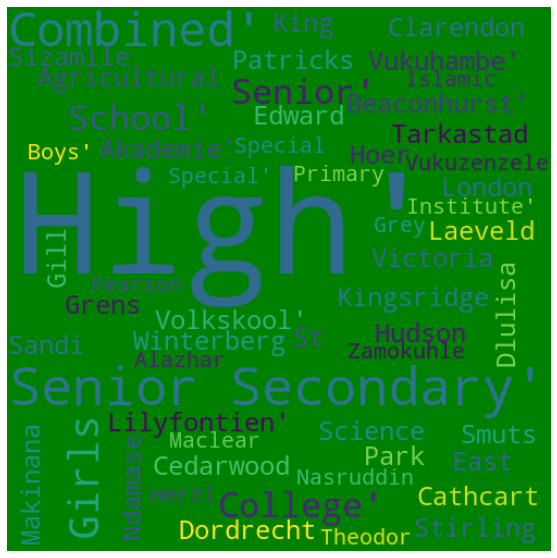

In [703]:
#make a list of all the schools with 100% pass rate 
temp_df= metric_df.loc[metric_df['_2014_pass_rate'] ==100.0,'school':'quintile']
temp_df
#the following schools got 100% pass rate in 2014
schools =list(temp_df.iloc[:,0])
schools


#use wordcloud to display the provinces

text = str(schools)
wordcloud = WordCloud(width=500, height=500, max_font_size=130, min_font_size=16,background_color="green").generate(text)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()


In [696]:
metric_df.loc[metric_df['_2012_pass_rate'] ==0.0,'school':'_2012_wrote']
# the table below shows the school that got zero percent pass rate
#with 56 pupils writing the exam 
#the school is from the 3rd quintile 

,school,dinaledi,quintile,_2014_pass_rate,_2014_achieved,_2014_wrote,_2013_pass_rate,_2013_achieved,_2013_wrote,_2012_pass_rate,_2012_achieved,_2012_wrote
0,Cradock Prison,N,3.0,0.0,0,5,0.0,0.0,4.0,0.0,NaN,0.0
2,St Marks Senior Secondary,N,0.0,20.0,4,20,0.0,NaN,0.0,0.0,NaN,0.0
3,Cedarwood School,N,0.0,100.0,9,9,0.0,NaN,0.0,0.0,NaN,0.0
4,Rivernorth Commercial School,N,0.0,46.7,7,15,0.0,NaN,0.0,0.0,NaN,0.0
5,Amabuye S,N,0.0,24.0,12,50,0.0,NaN,0.0,0.0,NaN,0.0
6,Mashesha Js,N,0.0,50.0,18,36,0.0,NaN,0.0,0.0,NaN,0.0
7,Sompukwane S,N,0.0,56.4,22,39,0.0,NaN,0.0,0.0,NaN,0.0
8,Phuthini S,N,0.0,12.5,2,16,0.0,NaN,0.0,0.0,NaN,0.0
9,Laeveld Akademie,N,0.0,100.0,5,5,0.0,NaN,0.0,0.0,NaN,0.0
10,Rostec Technical Fet College-,N,0.0,31.8,7,22,0.0,NaN,0.0,0.0,NaN,0.0


In [694]:
metric_df.loc[metric_df['_2013_pass_rate'] ==0.0,'school':'_2013_wrote']
# the table below shows the school that got zero percent pass rate
#with 13 pupils writing the exam 
#the schoosl are all from the 3rd quintile and one of them is a prison school 

,school,dinaledi,quintile,_2014_pass_rate,_2014_achieved,_2014_wrote,_2013_pass_rate,_2013_achieved,_2013_wrote
0,Cradock Prison,N,3.0,0.0,0,5,0.0,0.0,4.0
2,St Marks Senior Secondary,N,0.0,20.0,4,20,0.0,NaN,0.0
3,Cedarwood School,N,0.0,100.0,9,9,0.0,NaN,0.0
4,Rivernorth Commercial School,N,0.0,46.7,7,15,0.0,NaN,0.0
5,Amabuye S,N,0.0,24.0,12,50,0.0,NaN,0.0
6,Mashesha Js,N,0.0,50.0,18,36,0.0,NaN,0.0
7,Sompukwane S,N,0.0,56.4,22,39,0.0,NaN,0.0
8,Phuthini S,N,0.0,12.5,2,16,0.0,NaN,0.0
9,Laeveld Akademie,N,0.0,100.0,5,5,0.0,NaN,0.0
10,Rostec Technical Fet College-,N,0.0,31.8,7,22,0.0,NaN,0.0


In [695]:
metric_df.loc[metric_df['_2014_pass_rate'] ==0.0,'school':'_2014_wrote']
#four schools gotzero percent pass rate and two of them got zero percent in the previous year
#all of them are from the 3rd quintile
#33 pupils wrote the exam 

,school,dinaledi,quintile,_2014_pass_rate,_2014_achieved,_2014_wrote
0,Cradock Prison,N,3.0,0.0,0,5
261,Impey Siwisa High,N,3.0,0.0,0,2
358,Kwelerana Senior Secondary,N,3.0,0.0,0,14
391,Rabula Senior Secondary,N,3.0,0.0,0,12


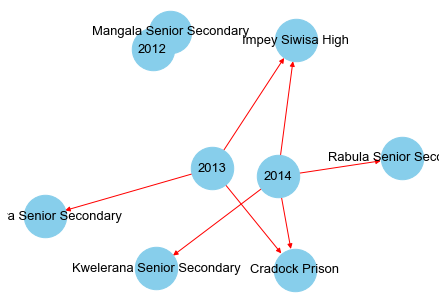

In [718]:
# libraries
import networkx as nx
#Create a table for the data 
metric_df = pd.DataFrame({ 'from':['2012', '2013', '2013','2013', '2014', '2014', '2014', '2014'], 'to':['Mangala Senior Secondary', 'Cradock Prison','Impey Siwisa High','Reshwa Senior Secondary',

                                      'Cradock Prison', 'Impey Siwisa High','Kwelerana Senior Secondary','Rabula Senior Secondary']})

# Build graph using the DiGraph function to create the graph!
G=nx.from_pandas_edgelist(metric_df, 'from', 'to', create_using=nx.DiGraph() )
 
# Make the graph
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1800, edge_color='red',width=1.0, font_size=13, font_color='black')

# the following network shows schools that achieved 0% pass rate
#there are two schools that appears both in 2013 and 2014 (cradock Prison and Impey Siwisa high)

In [715]:
metric_df.iloc[:7]

,from,to
0,2012,Mangala Senior Secondary
1,2013,Cradock Prison
2,2013,Impey Siwisa High
3,2013,Reshwa Senior Secondary
4,2014,Cradock Prison
5,2014,Impey Siwisa High
6,2014,Kwelerana Senior Secondary
